# 0. Импорты

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  

# 1. Описание задачи

По данным Всемирной организации здравоохранения (ВОЗ), инсульт занимает второе место среди причин смерти в мире, на него приходится около 11% всех смертей. Этот набор данных используется для прогнозирования вероятности инсульта у пациента на основе таких входных параметров, как пол, возраст, различные заболевания и статус курения. Каждая строка в данных содержит соответствующую информацию о пациенте.

- ```id```: уникальный идентификатор
- ```gender```: пол, мужской, женский, другое
- ```age```: возраст
- ```hypertension```: (гипертония), 0 если у пациента нет гипертонии, 1 если у пациента есть гипертония.
- ```heart_disease```: (заболевания сердца), 0 если у пациента нет заболеваний сердца, 1 если у пациента нет заболевание сердца
- ```ever_married```: был/а ли когда-нибудь женат/замужем, "Да", "Нет"
- ```work_type```: (тип работы), "с детьми", "работа на государство", "Никогда не работал", "Частная компания" or "Частный предприниматель"
- ```Residence_type```: (тип проживания), "сельская местность" or "город"
- ```avg_glucose_level```: средний уровень глюкозы в крови
- ```bmi```: индекс массы тела 
- ```smoking_status```: (отношение к курению), "курил раньше", "не курил никогда", "купит" or "неизвестно"*
- ```stroke```: (инсульт), 1 если у пациента был инсульт, 0 если не было

Требуется предсказать бинарный признак stroke - был у пациента инсульт или нет.

# 2. Загрузка данных и просмотр данных

In [2]:
raw_data = pd.read_csv("data/data.csv")

In [3]:
raw_data.shape

(5110, 12)

In [4]:
raw_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
raw_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
raw_data.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Столбцы ```gender```,  ```hypertension```, ```heart_disease```, ```ever_married```, ```work_type```, ```Residence_type```, ```smoking_status```, ```stroke``` содержат категориальные значения. Однако, пока они имеют тип 'Object'и 'int64' Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [8]:
raw_data['gender'] = raw_data['gender'].astype('category')
raw_data['hypertension'] = raw_data['hypertension'].astype('category')

raw_data['heart_disease'] = raw_data['heart_disease'].astype('category')
raw_data['ever_married'] = raw_data['ever_married'].astype('category')

raw_data['work_type'] = raw_data['work_type'].astype('category')
raw_data['Residence_type'] = raw_data['Residence_type'].astype('category')

raw_data['smoking_status'] = raw_data['smoking_status'].astype('category')
raw_data['stroke'] = raw_data['stroke'].astype('category')

Информация о числовых признаках:

In [9]:
raw_data.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


Информация о категориальных признаках:

In [10]:
raw_data.describe(include=['category'])

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


Позже будет произведена бинаризация категориальных признаков.

# 3. Пропущенные значения

In [11]:
raw_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Как можно увидеть из статистики выше, пропущенные значения есть только у одного признака - bmi (индекса массы тела). Пропущено около 4% значений (0.039). Так как пропущенных значений мало, то можно удалить все строки с пропущенными значениями, однако можно воспользоваться другим вариантом и заменить пропущенные значения медианой.

In [12]:
median = raw_data['bmi'].median()
raw_data['bmi'] = raw_data['bmi'].fillna(median)

In [13]:
raw_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Таким образом, избавились от пропущенных значений.

# 4. Визуализация, борьба с выбросами, анализ.

Построим диаграмы рассеивания:

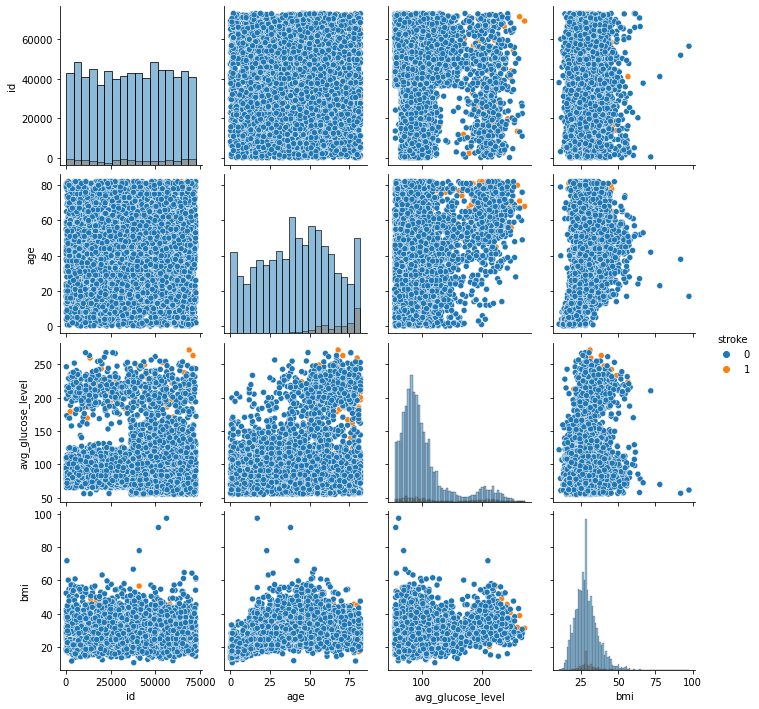

In [14]:
sns.pairplot(raw_data, diag_kind='hist', hue='stroke')

### Признак ```Age```
Построим для данного признака boxplot, гистограмму, а также violinplot, чтобы обнаружить выбросы, если они есть.

<AxesSubplot:xlabel='age'>

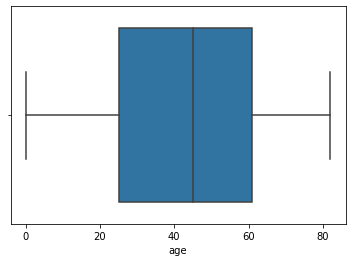

In [15]:
sns.boxplot(x=raw_data["age"])

<AxesSubplot:xlabel='age'>

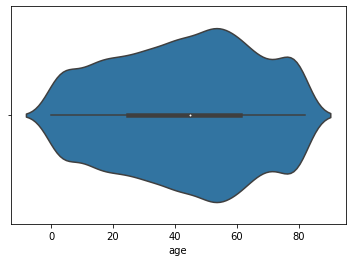

In [16]:
sns.violinplot(x=raw_data["age"])

<AxesSubplot:xlabel='age', ylabel='Count'>

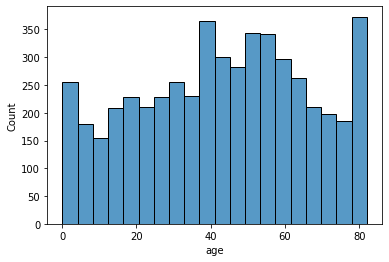

In [17]:
sns.histplot(x=raw_data["age"])

В признаке ```age``` не было найдено аномальных значений и выбросов.

### Признак ```avg_glucose_level```

<AxesSubplot:xlabel='avg_glucose_level'>

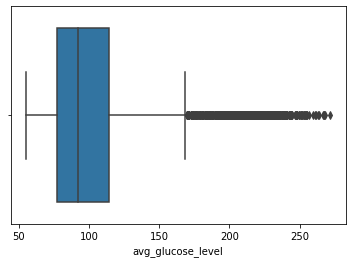

In [18]:
sns.boxplot(x=raw_data["avg_glucose_level"])

<AxesSubplot:xlabel='avg_glucose_level'>

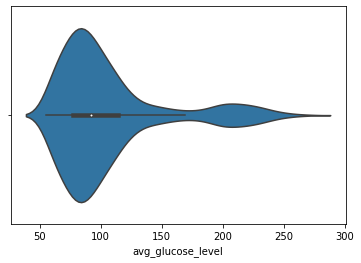

In [19]:
sns.violinplot(x=raw_data["avg_glucose_level"])

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

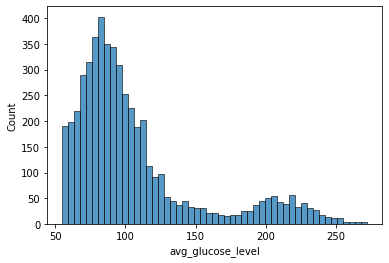

In [20]:
sns.histplot(x=raw_data["avg_glucose_level"])

На первый взгляд может показаться, что здесь достаточно большое число выбросов, однако, судя по виду гистограммы и violinplot - это бимодальное распределение. Поэтому было решено не удалять "аномальные значения".

### Признак ```bmi```

<AxesSubplot:xlabel='bmi'>

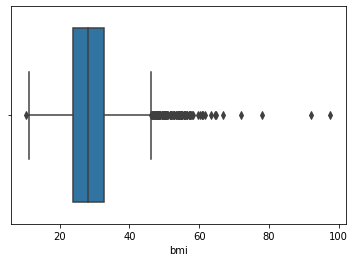

In [21]:
sns.boxplot(x=raw_data["bmi"])

<AxesSubplot:xlabel='bmi'>

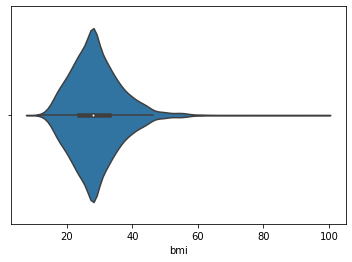

In [22]:
sns.violinplot(x=raw_data["bmi"])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

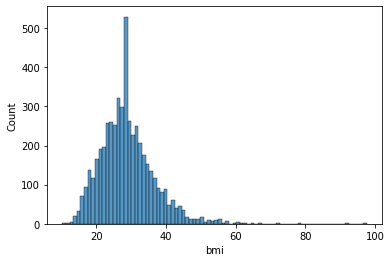

In [23]:
sns.histplot(x=raw_data["bmi"])

In [24]:
np.quantile(raw_data["bmi"], 0.005)

14.2545

In [25]:
np.quantile(raw_data["bmi"], 0.995)

55.9

In [26]:
(raw_data["bmi"] > 64).sum()

7

Для данного признака были посчитаны квантили уровней 0.995 и 0.005. Благодаря посчитанным значениям мы видим, что 99% всех значений признака ```bmi``` находится в диапазоне от 14.2545  до 55.9. Следовательно, все значения вне этого диапазона можно считать выбросами и удалить.

In [27]:
rows_to_drop = raw_data[
    (raw_data['bmi'] < raw_data['bmi'].quantile(0.005)) | (raw_data['bmi'] > raw_data['bmi'].quantile(0.995))].index

data = raw_data.drop(rows_to_drop)

### Признак ```id```

In [28]:
data['id'].unique

<bound method Series.unique of 0        9046
1       51676
2       31112
3       60182
4        1665
        ...  
5105    18234
5106    44873
5107    19723
5108    37544
5109    44679
Name: id, Length: 5059, dtype: int64>

In [29]:
data = data.drop('id', axis=1)

Признак является уникальным для каждого объекта и поэтому его следует удалить целиком.

In [30]:
corr_mat = data.corr()
corr_mat

,age,avg_glucose_level,bmi
age,1.000000,0.238768,0.336292
avg_glucose_level,0.238768,1.000000,0.172694
bmi,0.336292,0.172694,1.000000


<AxesSubplot:>

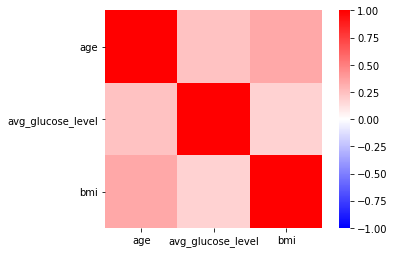

In [31]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='bwr')

<AxesSubplot:>

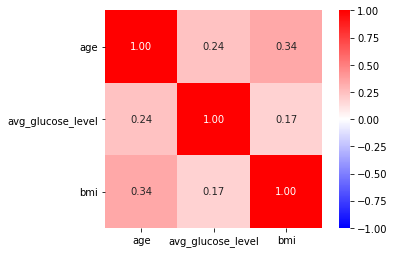

In [32]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='bwr')

# 5. Бинаризация номинальных признаков
На данный момент имеется 8 категориальных (номинальных признаков), а именно: ```gender```, ```hypertension```, ```heart_disease```, ```ever_married```, ```work_type```, ```Residence_type```, ```smoking_status```,```stroke```. Часть из них ещё не закодирована и представлена в текстовом виде и для того, чтобы с ними работать необходимо их закодировать. Для начала посмотрим на уникальные значения в каждом из признаков.

### Признак ```gender```

In [33]:
data['gender'].unique()

['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

(array([2.095e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.963e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

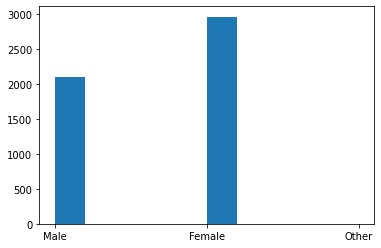

In [34]:
plt.hist(x=data['gender'])

In [35]:
(data["gender"] == 'Male').sum()

2095

In [36]:
(data["gender"] == 'Female').sum()

2963

In [37]:
(data["gender"] == 'Other').sum()

1

После построения гистограммы и проверки стало видно, что у признака ```gender``` значение "Other" встречается только 1 раз, а поэтому его можно удалить и рассматривать признак ```gender``` как бинарный.

In [38]:
rows_to_drop = data[(data['gender'] == 'Other')].index

data = data.drop(rows_to_drop)

In [39]:
data["gender"] = np.where(data["gender"] == "Female", 0, 1)

Единственная строка со значением "Other" была удалена, а сам признак был бинаризован ```Female``` -> 0, ```Male``` -> 1

### Признак ```ever_married```

In [40]:
data['ever_married'].unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

<AxesSubplot:xlabel='ever_married', ylabel='Count'>

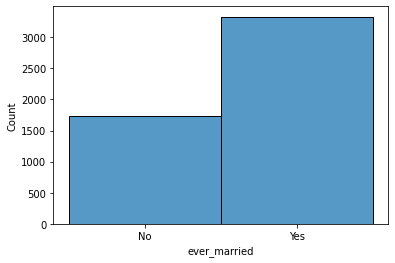

In [41]:
sns.histplot(x=data['ever_married'])

In [42]:
data["ever_married"] = np.where(data["ever_married"] == "No", 0, 1)

### Признак ```work_type```

In [43]:
data['work_type'].unique()

['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Categories (5, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']

<AxesSubplot:xlabel='work_type', ylabel='Count'>

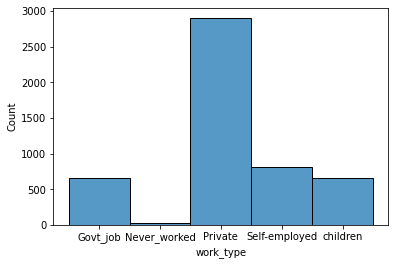

In [44]:
sns.histplot(x=data['work_type'])

In [45]:
(data["work_type"] == 'Never_worked').sum()

22

In [46]:
(data["work_type"] == 'Govt_job').sum()

654

In [47]:
(data["work_type"] == 'Private').sum()

2903

In [48]:
(data["work_type"] == 'Self-employed').sum()

814

In [49]:
(data["work_type"] == 'children').sum()

665

После построения гистограммы и проверки стало видно, что у признака ```work_type``` значение "Never_worked" встречается только 22 раза, а поэтому его следует удалить.

In [50]:
rows_to_drop = data[(data['work_type'] == 'Never_worked')].index

data = data.drop(rows_to_drop)

In [51]:
work_encode = {"work_type": {"Govt_job": 0, "Private": 1, "Self-employed": 2, "children": 3}}
data = data.replace(work_encode)

### Признак ```Residence_type```

In [52]:
data['Residence_type'].unique()

['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']

<AxesSubplot:xlabel='Residence_type', ylabel='Count'>

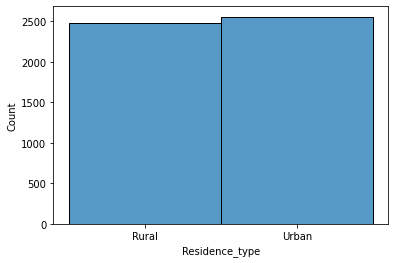

In [53]:
sns.histplot(x=data['Residence_type'])

In [54]:
data["Residence_type"] = np.where(data["Residence_type"] == "Rural", 0, 1)

### Признак ```smoking_status```

In [55]:
data['smoking_status'].unique()

['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Categories (4, object): ['Unknown', 'formerly smoked', 'never smoked', 'smokes']

<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

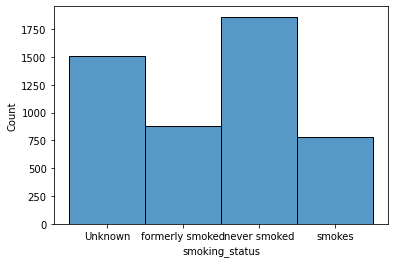

In [56]:
sns.histplot(x=data['smoking_status'])

In [57]:
smoke_encode = {"smoking_status": {"never smoked": 0, "formerly smoked": 1, "smokes": 2, "Unknown": 3}}
data = data.replace(smoke_encode)

In [58]:
data['gender'] = data['gender'].astype('category')
data['ever_married'] = data['ever_married'].astype('category')

data['work_type'] = data['work_type'].astype('category')
data['Residence_type'] = data['Residence_type'].astype('category')

data['smoking_status'] = data['smoking_status'].astype('category')

# 6. Обучающая и тестовая выборки
Для предсказания инсульта будем использовать все оставшиеся входные признаки.

In [59]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,0,61.0,0,0,1,2,0,202.21,28.1,0,1
2,1,80.0,0,1,1,1,0,105.92,32.5,0,1
3,0,49.0,0,0,1,1,1,171.23,34.4,2,1
4,0,79.0,1,0,1,2,0,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,1,83.75,28.1,0,0
5106,0,81.0,0,0,1,2,1,125.20,40.0,0,0
5107,0,35.0,0,0,1,2,0,82.99,30.6,0,0
5108,1,51.0,0,0,1,1,0,166.29,25.6,1,0


In [60]:
X = data.drop(['stroke'], axis=1)
y = data['stroke']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(3777, 1259)

# 7. Масштабирование количественных признаков
Нормализуем количественные признаки перед применением алгоритмов машинного обучения.

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [63]:
X_train.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,3.777000e+03,3.777000e+03,3.777000e+03,3.777000e+03,3.777000e+03,3.777000e+03,3.777000e+03,3.777000e+03,3.777000e+03,3.777000e+03
mean,1.273361e-16,3.650038e-17,-8.706594e-17,-5.688240e-16,2.786580e-17,-1.111105e-17,-3.077584e-16,8.397586e-17,2.415588e-16,-4.194568e-17
std,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00
min,-8.374672e-01,-1.935139e+00,-3.315163e-01,-2.345803e-01,-1.400840e+00,-1.521480e+00,-1.018978e+00,-1.130325e+00,-2.000777e+00,-1.098880e+00
25%,-8.374672e-01,-7.783528e-01,-3.315163e-01,-2.345803e-01,-1.400840e+00,-3.503714e-01,-1.018978e+00,-6.437439e-01,-6.785485e-01,-1.098880e+00
50%,-8.374672e-01,6.960013e-02,-3.315163e-01,-2.345803e-01,7.138574e-01,-3.503714e-01,9.813754e-01,-3.165292e-01,-1.000737e-01,-3.014794e-01
75%,1.194077e+00,7.836657e-01,-3.315163e-01,-2.345803e-01,7.138574e-01,8.207374e-01,9.813754e-01,1.858992e-01,5.472672e-01,1.293321e+00
max,1.194077e+00,1.720877e+00,3.016443e+00,4.262932e+00,7.138574e-01,1.991846e+00,9.813754e-01,3.612278e+00,3.728879e+00,1.293321e+00


# 8. Применение методов классификации
### 8.1 KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k_range = list(range(1, 64))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
  
grid_search = grid.fit(X_train, y_train)

Fitting 10 folds for each of 63 candidates, totalling 630 fits


In [65]:
grid.best_params_

{'n_neighbors': 1}

In [71]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}, ошибка: {np.mean(y_test != y_pred):.3f}")

Accuracy: 0.759, ошибка: 0.241


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [91]:
from sklearn.metrics import classification_report

target_names = ['Not stroke', 'Stroke']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Not stroke       0.95      0.78      0.86      1183
      Stroke       0.10      0.39      0.17        76

    accuracy                           0.76      1259
   macro avg       0.53      0.59      0.51      1259
weighted avg       0.90      0.76      0.82      1259



In [97]:
(data["stroke"] == 1).sum()

248

In [98]:
(data["stroke"] == 0).sum()

4788